# ***Results:***
- Le mappe/immagini hanno dimensioni varie, quella dominante resta 5120x5120
- All train_imgs have at least one map (usually 5, 4, 6)
- All maps_imgs of a train_img match in size
- In tutte le map_dir esclusa la 6 ci sono mappe: **s007_c137 e s007_c145** che non hanno una rispettiva immagine
  - conviene eliminare quelle mappe, dato che non sappiamo a cosa si riferiscono

# Imports & Variables

In [ ]:
import os
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt 
import random as rn

maps_paths = ['/content/drive/MyDrive/Maps1_6_T/Maps1_T/', '/content/drive/MyDrive/Maps1_6_T/Maps2_T/', '/content/drive/MyDrive/Maps1_6_T/Maps3_T/', '/content/drive/MyDrive/Maps1_6_T/Maps4_T/', '/content/drive/MyDrive/Maps1_6_T/Maps5_T/', '/content/drive/MyDrive/Maps1_6_T/Maps6_T/']
train_path = '/content/drive/MyDrive/Train Imgs'

def get_map_filename(filename, n):
    # given a filename of a image returns the map filename in the Nth folder
    target_filename = filename[:-4] + f"_MAP{n+1}.png"
    return target_filename


Mounted at /content/drive


# Rename images
- maps: slideXXX_coreYYY_classimg_nonconvex.png --> sXXX_cYYY_MAPn.png
- train images: slideXXX_coreYYY.jpeg --> sXXX_cYYY.png

In [ ]:
# handles maps 
NON_TOCCARE = True

if (NON_TOCCARE == False):
  for i in range(len(maps_paths)):
      for filename in os.listdir(maps_paths[i]):
          if filename.endswith('.png'):
              old_path = os.path.join(maps_paths[i], filename)
              new_filename = f's{filename[5:8]}_c{filename[13:16]}_MAP{i+1}.png' # added _MAP{i+1} can break stuff below
              new_path = os.path.join(maps_paths[i], new_filename)
              os.rename(old_path, new_path)

  # hadles train imgs
  for filename in os.listdir(train_path):
      if filename.endswith('.jpg'):
          old_path = os.path.join(train_path, filename)
          new_filename = f's{filename[5:8]}_c{filename[13:16]}.png'
          new_path = os.path.join(train_path, new_filename)
          os.rename(old_path, new_path)

# Exploring the dataset

## Check maps size in every map_dir

In [ ]:
# create list of shapes for every map_N

maps_sizedata = []
for dir in maps_paths:
    print(dir)
    mapn = []
    for filename in os.listdir(dir):
        if filename.endswith('.png'):
            # Load the PNG image using PIL
            image = Image.open(dir+filename)
            # Convert the PIL image to a NumPy array
            array = np.array(image)

            mapn.append(str(array.shape[0])+"x"+str(array.shape[1]))
    maps_sizedata.append(mapn)

# count occurrences for every shape in every mapN

maps_dicts = []

for mapn in maps_sizedata:
    mapn_dict = Counter(mapn)
    maps_dicts.append(mapn_dict)

/content/drive/MyDrive/Maps1_6_T/Maps1_T/
/content/drive/MyDrive/Maps1_6_T/Maps2_T/
/content/drive/MyDrive/Maps1_6_T/Maps3_T/
/content/drive/MyDrive/Maps1_6_T/Maps4_T/
/content/drive/MyDrive/Maps1_6_T/Maps5_T/
/content/drive/MyDrive/Maps1_6_T/Maps6_T/


### Display results

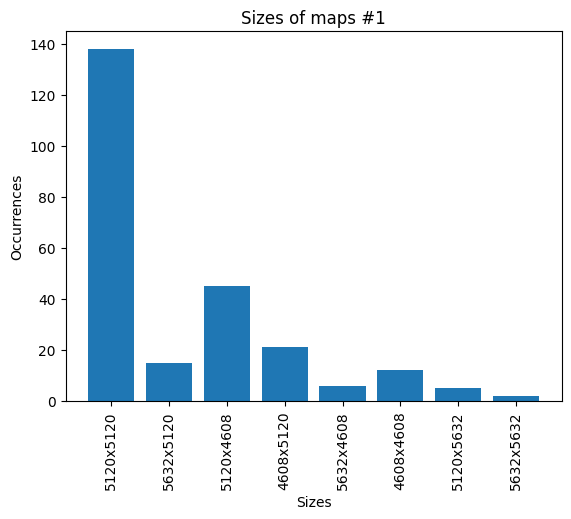

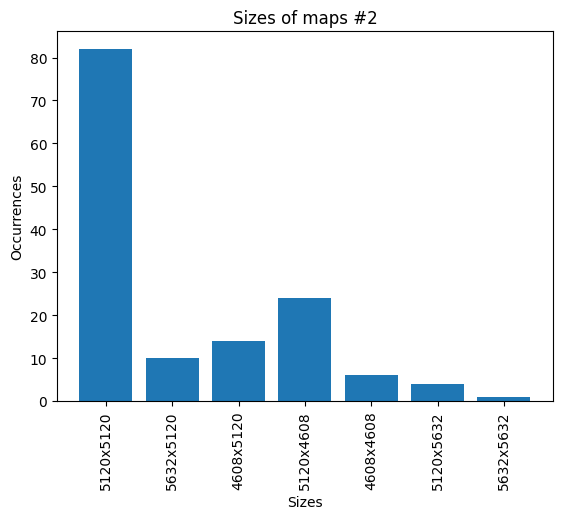

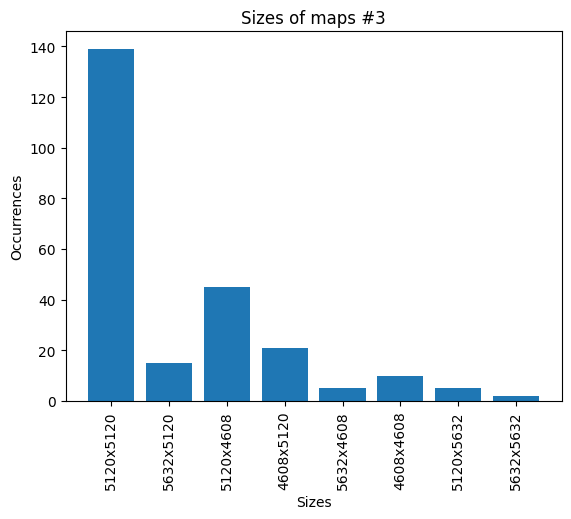

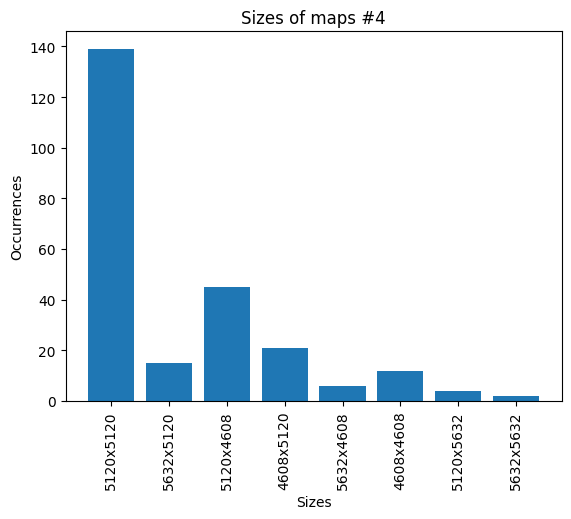

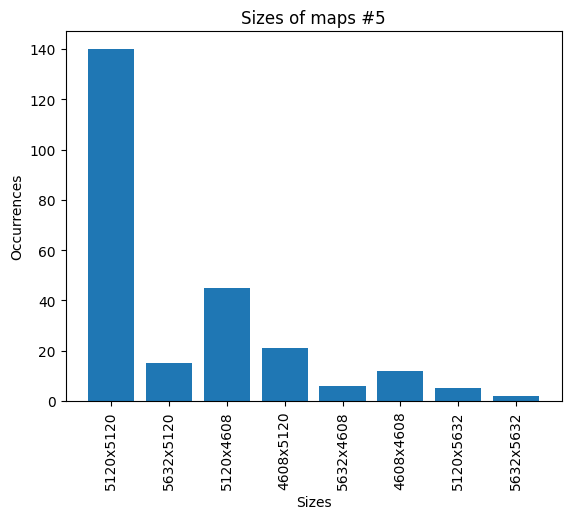

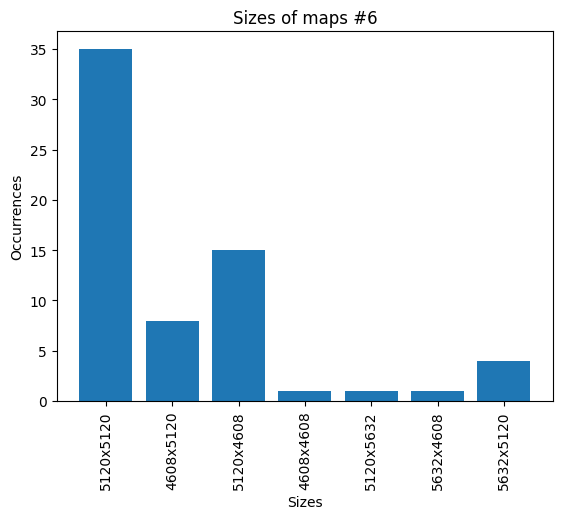

In [ ]:
# plot results

for i in range(len(maps_dicts)):
    plt.bar(maps_dicts[i].keys(), maps_dicts[i].values())

    # formatting graph
    title = "Sizes of maps #" + str(i+1)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel("Occurrences")
    plt.xlabel("Sizes")
    plt.show()
  

## Checking if there is a size mismatch between train_img and the corresponding map in the dataset

In [ ]:
# for every image in train_img
#     check if image exists in mapN (check if images has at least 1 map)
#     if it does, check if sizes match


for filename in os.listdir(train_path):

    # Load the PNG image using PIL
    train_image = Image.open(os.path.join(train_path, filename))
    # Convert the PIL image to a NumPy array
    train_array = np.array(train_image)

    hasMap = False
    if filename.endswith('.png'):
        for dir in maps_paths:
            if os.path.isfile(os.path.join(dir, filename)):
                hasMap = True

                map_image = Image.open(os.path.join(dir, filename))
                map_array = np.array(map_image)

                if map_array.shape != train_array.shape[0:2]:
                    print(map_array.shape)
                    print(train_array.shape[0:2])
                    print('------')
                    print("Shape mismatch!")

        if not hasMap:
          print(f"{filename} has no maps!")


## What happens in Map5!
- there are more maps than train_imgs (246 > 244)
- what if the problem is not only in Map5?
- there would be map_imgs not connected with train_imgs

### Maps: **s007_c137 and s007_c145** do not have their respective images!
- Let's exclude them from the dataset

In [ ]:
map5_path = maps_paths[4]

for filename in os.listdir(map5_path):
    if not os.path.isfile(os.path.join(train_path, filename)):
        print(f"{filename} does not appear in train_path")

s007_c137.png does not appear in train_path
s007_c145.png does not appear in train_path


In [ ]:
for dir in maps_paths:
    for filename in os.listdir(dir):
        if not os.path.isfile(os.path.join(train_path, filename)):
          print(f"In Map: {dir} found image: {filename} which do not appear in train_path")

In Map: /content/Maps1_T/Maps1_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps1_T/Maps1_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps2_T/Maps2_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps2_T/Maps2_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps3_T/Maps3_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps3_T/Maps3_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps4_T/Maps4_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps4_T/Maps4_T/ found image: s006_c137.png which do not appear in train_path
In Map: /content/Maps4_T/Maps4_T/ found image: s007_c145.png which do not appear in train_path
In Map: /content/Maps5_T/Maps5_T/ found image: s007_c137.png which do not appear in train_path
In Map: /content/Maps5_T/Maps5_T/ found image: s00

## Check how many masks are associated with every train_img:

In [ ]:
names = []
occs = []
for filename in os.listdir(train_path):
    
    acc = 0
    if filename.endswith('.png'):
        for i in range(len(maps_paths)):
            target_filename = filename[:-4] + f"_MAP{i+1}.png"
            print(target_filename)
            if os.path.isfile(os.path.join(maps_paths[i], target_filename)):
                acc += 1
    names.append(filename)
    occs.append(acc)

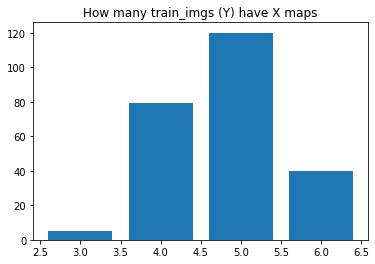

In [ ]:
occurrence_dict = Counter(occs)
plt.bar(occurrence_dict.keys(), occurrence_dict.values())

#formatting
plt.title("How many train_imgs (Y) have X maps")

plt.show()

Therefore:
- All train_imgs have at least 3 maps
- Most of them have 4,5,6 maps

---
# Visualizing the images and the maps

Use the first image six maps for simplicity (s006_c155.png)

In [ ]:
for filename in os.listdir(train_path):
    acc = 0
    for i in range(len(maps_paths)):
        target_filename = get_map_filename(filename, i)
        if os.path.isfile(os.path.join(maps_paths[i], target_filename)):
            acc += 1

    if acc == 6:
        print(filename)
        break

s006_c155.png


# Preprocessing

Since we have six different mask made by different patologists, we combine them through STAPLE (Simultaneous Truth and Performance Level Estimation) technique.

Labels in the masks have the following values:

```0, 1, 3, 4, 5, 6```

Since there are six classes, I'll convert the sixth value to two to make things clearer

```0, 1, 3, 4, 5, 6->2```


In [28]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.2/30.2 MB 7.4 MB/s eta 0:00:0000:0100:01


In [ ]:
import multiprocessing
from multiprocessing import Pool
import os

import SimpleITK as sitk

In [ ]:
def staple(filename, input_dir, output_dir):
  ''''
  The algorithm iterates throught the various directories in input_dir searching for files named "filename".
  Then it makes an array of the masks and combines them through STAPLE implemented in SimpleITK.
  In case of undecidedLabel, valued 255, the code will take the data from the first mask to resolve the missing information
  '''
  print("processing {}...".format(filename))

  #list of current "filename" mask
  imgs = []

  #for loop to join the various masks named filename
  for p in input_dir:
      if os.path.isfile(os.path.join(p, filename)):
          imgs.append(sitk.ReadImage(os.path.join(p, filename)))

  #apply of the STAPLE algorithm, 255 for undecided labels
  result = sitk.MultiLabelSTAPLE(imgs, 255)

  #as a implementative choice I've decided to fill the undecided Labels with pixel values from the first mask
  p1_data = sitk.GetArrayFromImage(imgs[0])
  result_data = sitk.GetArrayFromImage(result)
  result_data[result_data == 255] = p1_data[result_data == 255]
  
  #changing mask labels from 0, 1, 3, 4, 5, 6 -> 0, 1, 2, 3, 4, 5
  result_data[result_data == 6] = 2

  result = sitk.GetImageFromArray(result_data)
  result.CopyInformation(imgs[0])
  sitk.WriteImage(result, os.path.join(output_dir, filename))

In [ ]:
output_maps = '/content/drive/MyDrive/Staple Maps'


maskfiles = []
for i in maps_paths:
    maskfiles = maskfiles + os.listdir(i)
maskfiles = set(maskfiles)


processes = multiprocessing.cpu_count()

with Pool(processes=processes) as pool:
    results = [pool.apply_async(staple,
                                args=(maskfile, maps_paths,
                                      output_maps))
                for maskfile in maskfiles]
    _ = [_.get() for _ in results]
print("Done")

processing s005_c017.png...processing s002_c033.png...

processing s003_c055.png...
processing s005_c045.png...
processing s005_c033.png...
processing s002_c067.png...
processing s006_c004.png...
processing s001_c109.png...
processing s002_c030.png...
processing s007_c014.png...
processing s003_c056.png...
processing s002_c074.png...
processing s002_c002.png...
processing s005_c159.png...
processing s005_c063.png...
processing s001_c146.png...
processing s001_c066.png...
processing s005_c112.png...
processing s001_c059.png...
processing s003_c136.png...
processing s001_c012.png...
processing s001_c005.png...
processing s001_c011.png...
processing s006_c142.png...
processing s006_c090.png...
processing s002_c081.png...
processing s002_c052.png...
processing s003_c044.png...
processing s007_c046.png...
processing s003_c045.png...
processing s005_c102.png...
processing s006_c089.png...
processing s005_c111.png...
processing s002_c140.png...
processing s006_c120.png...
processing s007_c002

# Comparison of the masks
Let's the the difference between the six masks and the one generated from the STAPLE algorithm 

In [ ]:
import os

# Checking for common filename in maps 

# Get the files in the first subdirectory
common_filename = set(os.listdir(maps_paths[0]))

# Find the files that have the same name in all subdirectories
for subdir in maps_paths[1:]:
    common_filename.intersection_update(os.listdir(subdir))

# Print the common files
print(list(common_filename))


['s006_c115.png', 's001_c041.png', 's007_c047.png', 's002_c009.png', 's006_c105.png', 's002_c080.png', 's005_c069.png', 's006_c084.png', 's007_c043.png', 's006_c011.png', 's007_c048.png', 's006_c129.png', 's001_c111.png', 's005_c041.png', 's006_c087.png', 's006_c125.png', 's005_c074.png', 's002_c033.png', 's006_c110.png', 's002_c052.png', 's002_c026.png', 's006_c155.png', 's006_c083.png', 's002_c042.png', 's001_c159.png', 's001_c005.png', 's003_c114.png', 's002_c140.png', 's005_c009.png', 's006_c120.png', 's007_c002.png', 's005_c097.png', 's001_c160.png', 's007_c044.png', 's001_c059.png', 's003_c046.png', 's003_c136.png', 's002_c017.png', 's005_c063.png', 's005_c140.png']


s005_c074.png


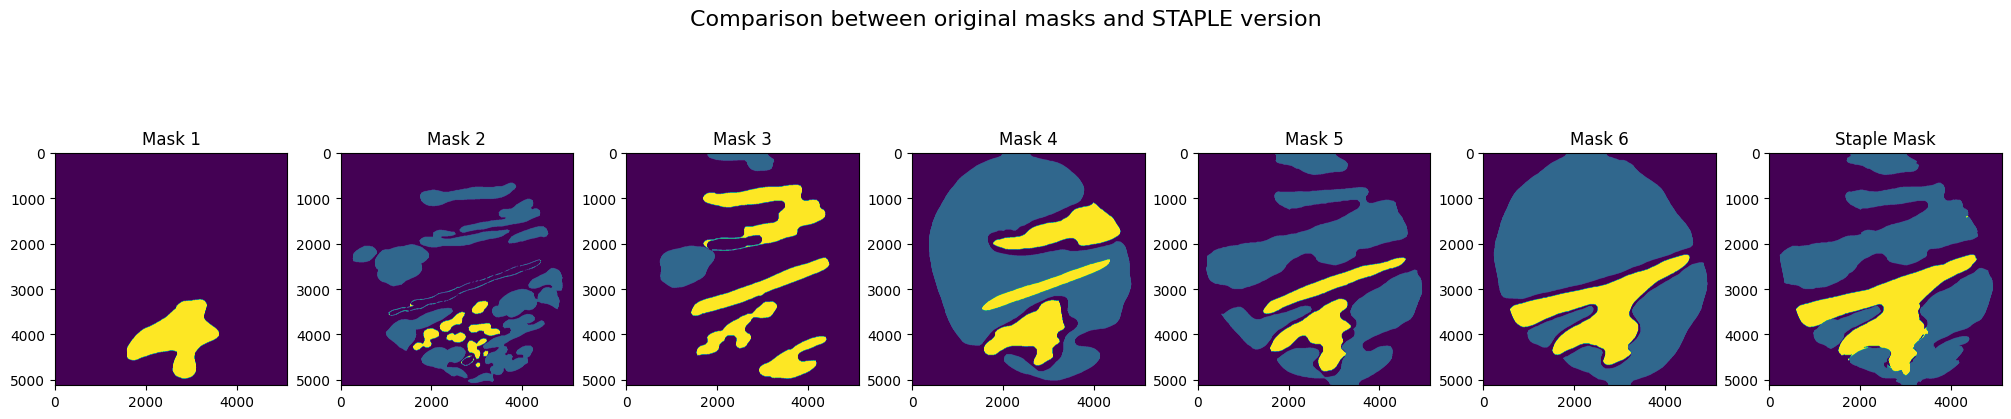

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

filename = random.choice(tuple(common_filename))
print(filename)
staple_maps = '/content/drive/MyDrive/Staple Maps'

# Load the original masks
masks = []
for maps in maps_paths:
    img = np.array(Image.open(os.path.join(maps, filename)))
    masks.append(img)


# Load the STAPLE version
staple_mask = np.array(Image.open(os.path.join(staple_maps, filename)))

fig, axs = plt.subplots(1, 7, figsize=(20, 5), constrained_layout=True)

for i, mask in enumerate(masks):
  ax = axs[i]
  ax.imshow(mask)
  ax.set_title(f"Mask {i+1}")

# Plot the STAPLE version
ax = axs[-1]
ax.imshow(staple_mask)
ax.set_title("Staple Mask")

# Set the title of the plot
fig.suptitle("Comparison between original masks and STAPLE version", fontsize=16)

# Show the plot
plt.show()


# Transforming Images
To fit server hardware we'll apply some transformation to our images.
- Firstly we resize them to a 2048x2048 format
- Secondly, we patch them

### The naming convention is **sXXX_cYYY_vRC.png** where R and C stand respectively for row and column

In [8]:
def patchify(img, type):
    '''Scales the image to 2048x2048 and divide in patches of 256x256'''
    img = img.resize((2048, 2048), resample=Image.NEAREST)
    img_to_tensor = tf.convert_to_tensor(img)
    img_to_tensor = tf.expand_dims(img_to_tensor, axis=0)
    if type == 'mask':
        img_to_tensor = tf.expand_dims(img_to_tensor, axis=-1)


    patches = tf.image.extract_patches(images = img_to_tensor,
                                        sizes=[1, 256, 256, 1], 
                                        strides=[1, 256, 256, 1], 
                                        rates=[1, 1, 1, 1], 
                                        padding='VALID')
    
    return patches

In [39]:
def save_patches(patches, output_dir, filename, size, type):
    filename = os.path.splitext(filename)[0]
    '''Given a group of patches it saves them in output_dir with the naming convention "filename_vRC"'''
    for imgs in patches:    
        for r in range(size):
                for c in range(size):
                    if type == 'mask':
                        shape = (256,256)
                    if type == 'train':
                        shape = (256,256,3)
                    img = tf.reshape(imgs[r,c],shape=shape).numpy().astype("uint8")
                    img_pil = Image.fromarray(img)
                    name = filename + f'_v{r}{c}.png'
                    dir = os.path.join(output_dir, name)
                    img_pil.save(dir)
        

In [61]:
def join_patches(search_dir, file_dir, type, size=8):
    '''Given a file name in the format "sXXX_cYYY.png" the function search for all patches named "sXXX_cYYY_vRC.png" in "search_dir" and combine them into a full image. The "size"
    parameter refers to the number of rows and column'''

    dim = size*size
    file_dir = os.path.splitext(file_dir)[0]
    # Parse the file name to get the patch indices
    filename_parts = os.path.basename(file_dir).split("_")
    if len(filename_parts) != 2 or not filename_parts[0].startswith("s") or not filename_parts[1].startswith("c"):
        print(f"Error: Invalid file name format: {file_dir}")
        return
    
    s_idx = int(filename_parts[0][1:])
    c_idx = int(filename_parts[1][1:])
    
    # Load all patch images and combine them into a single image
    patch_images = []
    for r in range(size):
        for c in range(size):
            # Construct the filename for the patch image
            patch_filename = f"s{s_idx:03d}_c{c_idx:03d}_v{r}{c}.png"
            patch_filepath = os.path.join(search_dir, patch_filename)
            
            # Load the patch image and append it to the list of patch images
            patch_image = Image.open(patch_filepath)
            if type == 'mask':
                patch_image = patch_image.convert('RGB')
            
            patch_images.append(patch_image)
    
    # Check that we found all dim patch images
    if len(patch_images) != dim:
        print(f"Error: Found {len(patch_images)} patch images instead of 64")
        return
    
    # Combine the patch images into a single image
    patch_arrays = [np.array(img) for img in patch_images]
    patch_shape = patch_arrays[0].shape
    full_image = np.zeros((patch_shape[0]*size, patch_shape[1]*size, patch_shape[2]), dtype=np.uint8)
    for r in range(size):
        for c in range(size):
            full_image[r*patch_shape[0]:(r+1)*patch_shape[0], c*patch_shape[1]:(c+1)*patch_shape[1], :] = patch_arrays[r*size+c]

    full_image_pil = Image.fromarray(full_image)
    if type == 'mask':
        full_image_pil = full_image_pil.getchannel(0)
    return full_image_pil
    

## Now the following code will iterate each image in "Train Imgs" and "Staple Maps"

In [12]:
def trasformToPatches(type, input_dir, output_dir):
        for filename in os.listdir(input_dir):
            if not filename.endswith(".png"):
                continue
            
            # Load the image
            img_path = os.path.join(input_dir, filename)
            img = Image.open(img_path)
            
            # Patchify the image
            patches = patchify(img,type)
            
            # Save the patches
            save_patches(patches, output_dir, filename, 8, type)

In [42]:
trasformToPatches('train','Train Imgs', 'train_patches')

In [41]:
trasformToPatches('mask', 'Staple Maps', 'masks_patches')

In [43]:
num_elements = len(os.listdir('train_patches'))
print("Number of elements in the folder:", num_elements)
num_elements = len(os.listdir('masks_patches'))
print("Number of elements in the folder:", num_elements)

Number of elements in the folder: 15616
Number of elements in the folder: 15616


In the end we have 64*244 images, i.e. 15616. Since the dataset is very large I'll firstly try without any sort of data augmentation

## Comparison between reconstruced patch images and originals

s005_c046.png


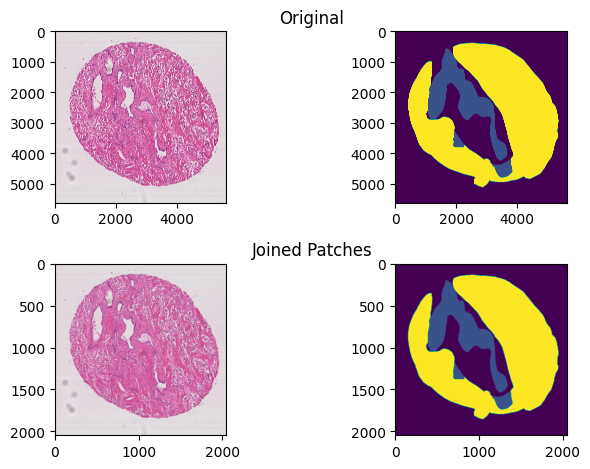

In [64]:
import random

file_list = os.listdir('Train Imgs')
random_file = random.choice(file_list)
print(random_file)

original_train = Image.open(os.path.join('Train Imgs', random_file))
original_mask = Image.open(os.path.join('Staple Maps', random_file))
patch_train = join_patches('train_patches', random_file, 'train')
patch_mask = join_patches('masks_patches', random_file, 'mask')


fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(original_train)
axs[0, 1].imshow(original_mask)
axs[1, 0].imshow(patch_train)
axs[1, 1].imshow(patch_mask)

axs[0, 0].set_title("Original", x = 1.5)
axs[1, 0].set_title("Joined Patches", x = 1.5)

plt.tight_layout()
plt.show()

# Defining functions for the data loading
Below some functions for the data generation and augmentation along with some code to adjust the data

In [ ]:
import tensorflow as tf


def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    return (img,mask)



def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**aug_dict)
    mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)


In [ ]:
batch_size = 30

num_classes = 6

path = '/content/drive/MyDrive'

maps_path = '/content/drive/MyDrive/Staple Maps'

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')


In [ ]:
dataset = trainGenerator(batch_size, path, 'Train Imgs','Staple Maps', data_gen_args, flag_multi_class= True, num_class=num_classes)